In [122]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2343918107668624592]

In [10]:
import pandas as pd
import os
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


3.4.3


In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

train_X = train.drop('Target', axis=1)
train_y = train.Target

In [12]:
train_X = pd.get_dummies(data = train_X, columns = ['Gender'], prefix = 'Gender')
test = pd.get_dummies(data = test, columns = ['Gender'], prefix = 'Gender')

In [ ]:
train_X

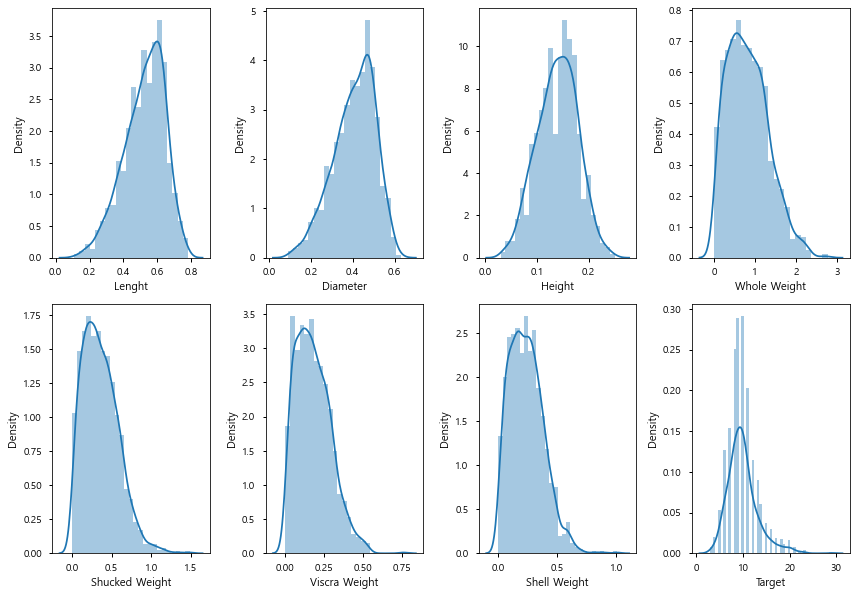

In [3]:
plt.figure(figsize=(12,12))
for i in range(1,9):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

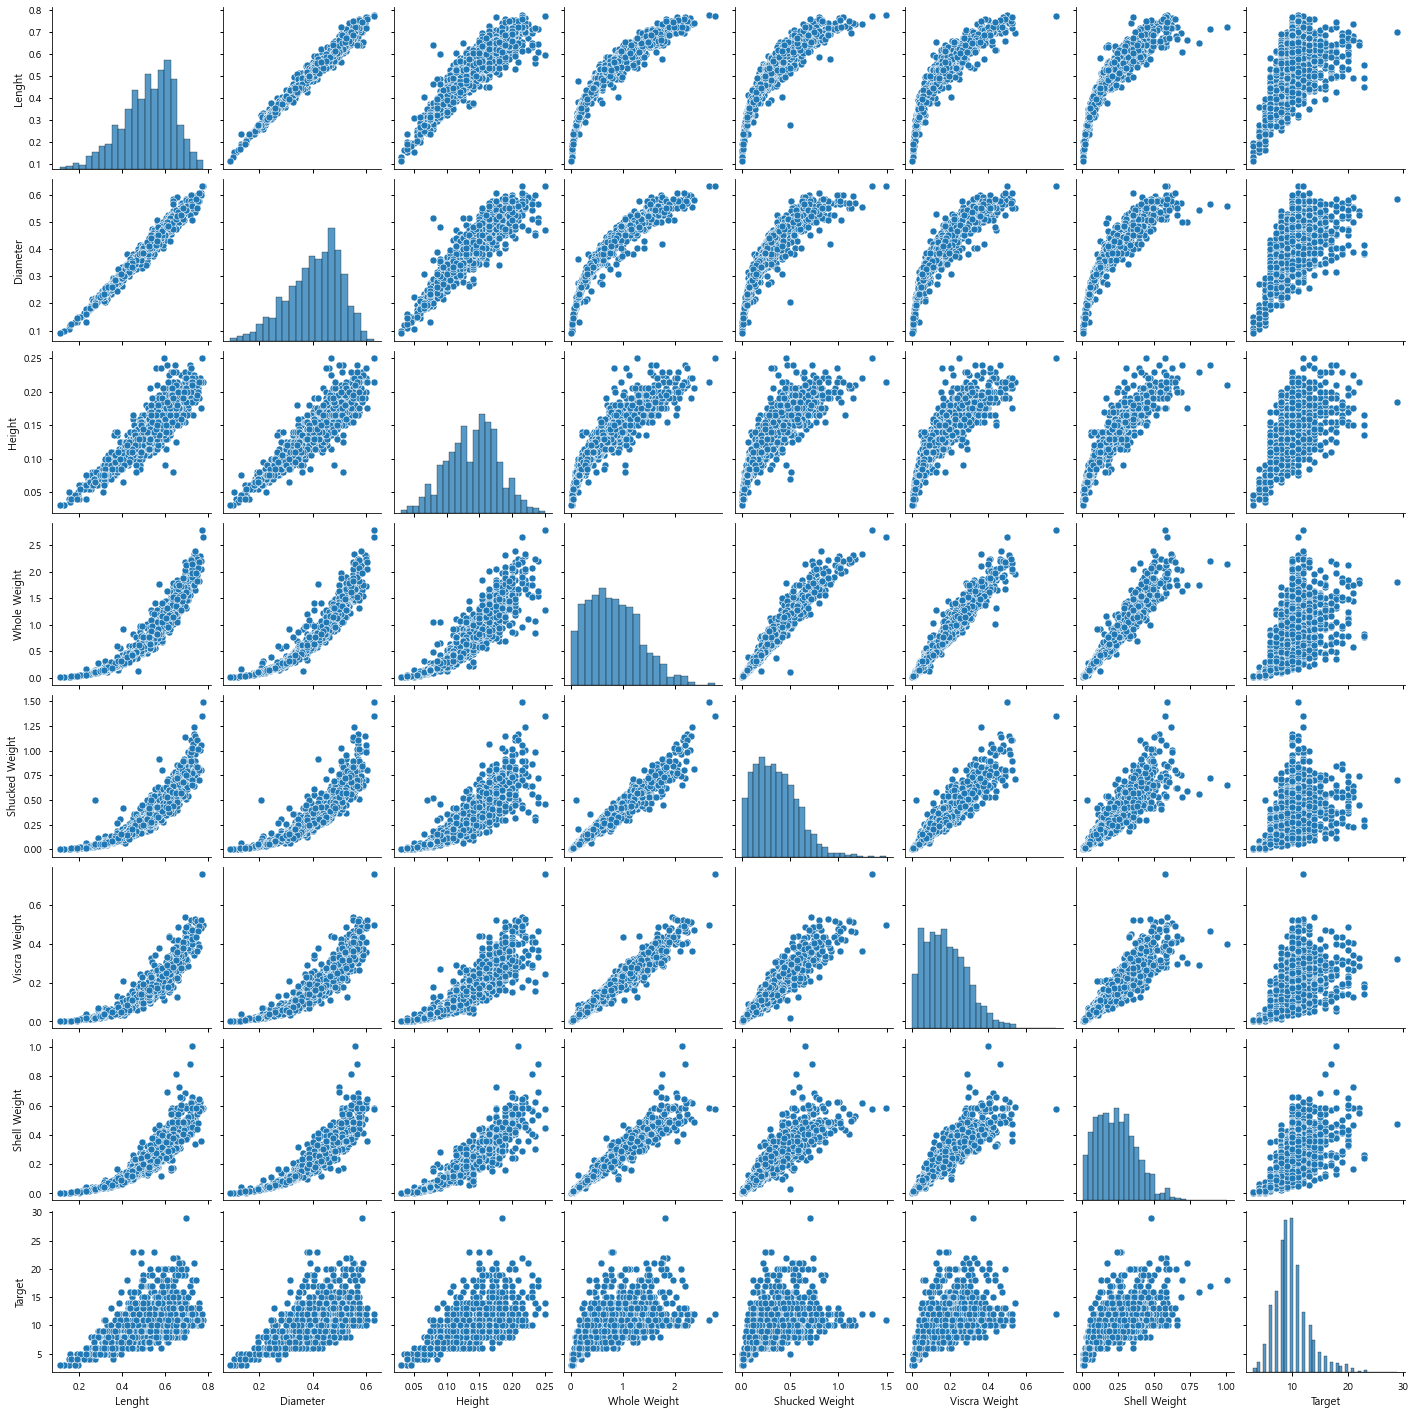

In [4]:
sns.pairplot(train)

# 파이캐럿 (전처리 X)

In [ ]:
pycaret_data = pd.get_dummies(data = train, columns = ['Gender'], prefix = 'Gender')

In [ ]:
from pycaret.classification import *
from pycaret.regression import *

In [ ]:
setup_clf = setup(data = pycaret_data, target = 'Target', fold_shuffle=True, use_gpu=True, silent=True)

In [ ]:
top10 = compare_models(sort='MAE', n_select=10, fold = 5)

In [ ]:
tuned_top10 = [tune_model(i, fold = 5) for i in top10]

In [ ]:
blender_top10 = blend_models(estimator_list=tuned_top10)

In [ ]:
final_model = finalize_model(blender_top10)
prediction = predict_model(final_model, data= test)

In [ ]:
prediction

In [ ]:
prediction['Label']

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission['Target'] = prediction['Label']

submission

submission.to_csv('submission.csv',index=False)

# 딥러닝 기반

In [13]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from sklearn.model_selection import train_test_split

In [231]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(16, input_dim=10, activation='elu'))
model.add(Dense(32, activation='elu'))    
model.add(Dense(64, activation='elu'))  
model.add(Dropout(0.5))  
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(1))


model.compile(loss='mean_absolute_error',
              optimizer='Nadam', 
              metrics=['mae'])

In [232]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
cp = ModelCheckpoint(filepath=modelpath, monitor='val_mae', verbose=0, save_best_only=True, mode = 'min')

# 학습 자동 중단 설정
es = EarlyStopping(monitor='val_mae', patience=50, mode='min')

rlrp = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=40, mode='min')

In [233]:
# 모델 학습
model.fit(train_X, train_y, validation_split=0.3, epochs=1000, batch_size=32, verbose=1, callbacks=[es, cp, rlrp])

Epoch 1/1000
28/28 [==============================] - 1s 4ms/step - loss: 8.3468 - mae: 8.3468 - val_loss: 5.5655 - val_mae: 5.5655
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 3.0585 - mae: 3.0585 - val_loss: 2.1898 - val_mae: 2.1898
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 2.0512 - mae: 2.0512 - val_loss: 1.9787 - val_mae: 1.9787
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.9587 - mae: 1.9587 - val_loss: 1.9376 - val_mae: 1.9376
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.8573 - mae: 1.8573 - val_loss: 1.9344 - val_mae: 1.9344
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.8711 - mae: 1.8711 - val_loss: 1.9300 - val_mae: 1.9300
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.7970 - mae: 1.7970 - val_loss: 1.9219 - val_mae: 1.9219
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.

28/28 [==============================] - 0s 1ms/step - loss: 1.5254 - mae: 1.5254 - val_loss: 1.7251 - val_mae: 1.7251
Epoch 63/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5588 - mae: 1.5588 - val_loss: 1.9418 - val_mae: 1.9418
Epoch 64/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5334 - mae: 1.5334 - val_loss: 1.7009 - val_mae: 1.7009
Epoch 65/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5669 - mae: 1.5669 - val_loss: 1.7238 - val_mae: 1.7238
Epoch 66/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5147 - mae: 1.5147 - val_loss: 1.7100 - val_mae: 1.7100
Epoch 67/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5354 - mae: 1.5354 - val_loss: 1.7241 - val_mae: 1.7241
Epoch 68/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5509 - mae: 1.5509 - val_loss: 1.6905 - val_mae: 1.6905
Epoch 69/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5193 -

28/28 [==============================] - 0s 1ms/step - loss: 1.4764 - mae: 1.4764 - val_loss: 1.6160 - val_mae: 1.6160
Epoch 124/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4954 - mae: 1.4954 - val_loss: 1.6168 - val_mae: 1.6168
Epoch 125/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4952 - mae: 1.4952 - val_loss: 1.6542 - val_mae: 1.6542
Epoch 126/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4905 - mae: 1.4905 - val_loss: 1.6534 - val_mae: 1.6534
Epoch 127/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4814 - mae: 1.4814 - val_loss: 1.6470 - val_mae: 1.6470
Epoch 128/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4837 - mae: 1.4837 - val_loss: 1.6851 - val_mae: 1.6851
Epoch 129/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4766 - mae: 1.4766 - val_loss: 1.6142 - val_mae: 1.6142
Epoch 130/1000
28/28 [==============================] - 0s 2ms/step - loss: 1

28/28 [==============================] - 0s 2ms/step - loss: 1.4382 - mae: 1.4382 - val_loss: 1.5370 - val_mae: 1.5370
Epoch 185/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4378 - mae: 1.4378 - val_loss: 1.5598 - val_mae: 1.5598
Epoch 186/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4186 - mae: 1.4186 - val_loss: 1.5522 - val_mae: 1.5522
Epoch 187/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4207 - mae: 1.4207 - val_loss: 1.5479 - val_mae: 1.5479
Epoch 188/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4382 - mae: 1.4382 - val_loss: 1.5801 - val_mae: 1.5801
Epoch 189/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4192 - mae: 1.4192 - val_loss: 1.5328 - val_mae: 1.5328
Epoch 190/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4344 - mae: 1.4344 - val_loss: 1.5610 - val_mae: 1.5610
Epoch 191/1000
28/28 [==============================] - 0s 2ms/step - loss: 1

Epoch 245/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.3930 - mae: 1.3930 - val_loss: 1.5217 - val_mae: 1.5217
Epoch 246/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.3827 - mae: 1.3827 - val_loss: 1.5293 - val_mae: 1.5293
Epoch 247/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4233 - mae: 1.4233 - val_loss: 1.5240 - val_mae: 1.5240
Epoch 248/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4171 - mae: 1.4171 - val_loss: 1.5330 - val_mae: 1.5330
Epoch 249/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4000 - mae: 1.4000 - val_loss: 1.5295 - val_mae: 1.5295
Epoch 250/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4233 - mae: 1.4233 - val_loss: 1.5326 - val_mae: 1.5326
Epoch 251/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.3967 - mae: 1.3967 - val_loss: 1.5267 - val_mae: 1.5267
Epoch 252/1000
28/28 [==============================] - 0s 1ms

28/28 [==============================] - 0s 2ms/step - loss: 1.3745 - mae: 1.3745 - val_loss: 1.5381 - val_mae: 1.5381
Epoch 307/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.3868 - mae: 1.3868 - val_loss: 1.5259 - val_mae: 1.5259
Epoch 308/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4052 - mae: 1.4052 - val_loss: 1.5298 - val_mae: 1.5298
Epoch 309/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.3795 - mae: 1.3795 - val_loss: 1.5189 - val_mae: 1.5189
Epoch 310/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.3702 - mae: 1.3702 - val_loss: 1.5241 - val_mae: 1.5241
Epoch 311/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.3736 - mae: 1.3736 - val_loss: 1.5172 - val_mae: 1.5172
Epoch 312/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.3891 - mae: 1.3891 - val_loss: 1.5170 - val_mae: 1.5170
Epoch 313/1000
28/28 [==============================] - 0s 1ms/step - loss: 1

In [194]:
Y_prediction = model.predict(test).flatten()

In [195]:
Y_prediction

array([ 9.297972, 13.851917,  5.551965, ...,  9.333509,  8.590915,
       12.270287], dtype=float32)

In [196]:
submission = pd.read_csv('sample_submission.csv')

submission['Target'] = Y_prediction

submission

submission.to_csv('submission.csv',index=False)

# Kfold

In [57]:
from sklearn.model_selection import StratifiedKFold

In [197]:
skf = StratifiedKFold(n_splits = 10, random_state = 123, shuffle = True)

In [198]:
es = EarlyStopping(monitor='val_mae', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=45, mode='min')

In [199]:
nn_val_mae = []
nn_pred = np.array([0.0]*2924)
for i, (tr_idx, val_idx) in enumerate(skf.split(train_X, train_y)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = train_X.iloc[tr_idx], train_y[tr_idx]
    val_x, val_y = train_X.iloc[val_idx], train_y[val_idx]
    
    ### NN 모델
    model = Sequential()
    model.add(Dense(16, input_dim=10, activation='elu'))
    model.add(Dense(32, activation='elu'))    
    model.add(Dense(64, activation='elu'))            
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(16, activation='elu'))
    model.add(Dense(1))

    ### ModelCheckPoint Fold마다 갱신
    cp = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_mae', mode = 'min', verbose = 0)
    ### 모델 compile
    model.compile(loss='mean_absolute_error',
                  optimizer='Nadam', 
                  metrics=['mae'])

    result = model.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 1000, batch_size = 32, callbacks = [es, cp, rlrp], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### Fold별 val_mae 산출
    fold_val_mae = result.history['val_mae'][-51]
    nn_val_mae.append(fold_val_mae)
    print(f'{i + 1} Fold val mae = {fold_val_mae}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(test).flatten()
    nn_pred += fold_pred

1 Fold Training.....
1 Fold val mae = 1.4676733016967773

2 Fold Training.....
2 Fold val mae = 1.287061333656311

3 Fold Training.....
3 Fold val mae = 1.5796390771865845

4 Fold Training.....
4 Fold val mae = 1.4758315086364746

5 Fold Training.....
5 Fold val mae = 1.5080046653747559

6 Fold Training.....
6 Fold val mae = 1.4859299659729004

7 Fold Training.....
7 Fold val mae = 1.2347930669784546

8 Fold Training.....
8 Fold val mae = 1.415439486503601

9 Fold Training.....
9 Fold val mae = 1.4209425449371338

10 Fold Training.....
10 Fold val mae = 1.3414922952651978



In [200]:
np.mean(nn_val_mae)

1.4216807246208192

In [137]:
submission = pd.read_csv('sample_submission.csv')

submission['Target'] = nn_pred / skf.n_splits

submission

submission.to_csv('submission.csv',index=False)

# 실험실

## 표준화

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
train_X_scaled = pd.DataFrame(data=train_X_scaled, columns=train_X.columns)

In [6]:
train_X_scaled

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.683382,0.632069,-0.629084,0.565272,0.150018,0.983043,0.490632,-0.659758,-0.689822,1.292920
1,-0.772731,-0.922116,-1.141679,-0.905870,-0.818704,-0.902715,-0.951302,-0.659758,1.449650,-0.773443
2,0.475366,0.832609,1.421295,0.970036,0.764655,0.652365,1.192304,-0.659758,1.449650,-0.773443
3,0.100937,-0.019686,0.908700,0.878090,0.842598,1.300315,0.680084,-0.659758,-0.689822,1.292920
4,-1.771209,-1.724275,-1.269828,-1.407577,-1.384349,-1.340640,-1.403880,-0.659758,1.449650,-0.773443
...,...,...,...,...,...,...,...,...,...,...
1248,-2.769687,-2.626705,-2.551316,-1.585474,-1.524646,-1.559602,-1.579298,-0.659758,1.449650,-0.773443
1249,-1.063954,-0.972251,-1.397977,-1.027799,-0.916690,-1.166364,-1.028486,-0.659758,1.449650,-0.773443
1250,0.017730,0.030449,-0.629084,-0.113332,0.254684,-0.160924,-0.421540,1.515707,-0.689822,-0.773443
1251,-0.647921,-0.721576,-0.757233,-0.790937,-0.696222,-0.639066,-0.846052,1.515707,-0.689822,-0.773443


# 딥러닝 기반

In [23]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from sklearn.model_selection import train_test_split

In [24]:
# train, test 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=123)

In [25]:
X_train

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
525,0.620,0.470,0.145,1.0865,0.5110,0.2715,0.2565,0,0,1
229,0.375,0.275,0.095,0.2465,0.1100,0.0415,0.0775,0,1,0
690,0.615,0.505,0.190,1.4030,0.6715,0.2925,0.3650,0,0,1
303,0.660,0.520,0.190,1.5580,0.7550,0.2980,0.4000,0,0,1
289,0.600,0.465,0.165,1.0475,0.4650,0.2345,0.3150,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1238,0.425,0.340,0.120,0.3880,0.1490,0.0870,0.1250,0,0,1
1147,0.650,0.505,0.175,1.2075,0.5105,0.2620,0.3900,1,0,0
106,0.565,0.445,0.145,0.9255,0.4345,0.2120,0.2475,0,0,1
1041,0.315,0.210,0.060,0.1250,0.0600,0.0375,0.0350,0,1,0


In [131]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(16, input_dim=10, activation='elu'))
model.add(Dense(32, activation='elu'))    
model.add(Dense(64, activation='elu'))            
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(1))


model.compile(loss='mean_absolute_error',
              optimizer='adam', 
              metrics=['mae'])

In [132]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_mae', verbose=0, save_best_only=True, mode = 'min')

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_mae', patience=50, mode='min')

rlrp = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=20, mode='min')

In [133]:
# 모델 학습
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping_callback, checkpointer, rlrp])

Epoch 1/1000
22/22 [==============================] - 0s 5ms/step - loss: 8.3302 - mae: 8.3302 - val_loss: 6.2271 - val_mae: 6.2271
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.6819 - mae: 3.6819 - val_loss: 1.8998 - val_mae: 1.8998
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.9440 - mae: 1.9440 - val_loss: 1.7800 - val_mae: 1.7800
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.8230 - mae: 1.8230 - val_loss: 1.7451 - val_mae: 1.7451
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.7987 - mae: 1.7987 - val_loss: 1.7423 - val_mae: 1.7423
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.8050 - mae: 1.8050 - val_loss: 1.7490 - val_mae: 1.7490
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.7970 - mae: 1.7970 - val_loss: 1.7376 - val_mae: 1.7376
Epoch 8/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.

22/22 [==============================] - 0s 2ms/step - loss: 1.4129 - mae: 1.4129 - val_loss: 1.4394 - val_mae: 1.4394
Epoch 124/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.4256 - mae: 1.4256 - val_loss: 1.4955 - val_mae: 1.4955
Epoch 125/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.4461 - mae: 1.4461 - val_loss: 1.4322 - val_mae: 1.4322
Epoch 126/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.4068 - mae: 1.4068 - val_loss: 1.4333 - val_mae: 1.4333
Epoch 127/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.3996 - mae: 1.3996 - val_loss: 1.4296 - val_mae: 1.4296
Epoch 128/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.4007 - mae: 1.4007 - val_loss: 1.4306 - val_mae: 1.4306
Epoch 129/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.4010 - mae: 1.4010 - val_loss: 1.4273 - val_mae: 1.4273
Epoch 130/1000
22/22 [==============================] - 0s 2ms/step - loss: 1

Epoch 184/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.3922 - mae: 1.3922 - val_loss: 1.4257 - val_mae: 1.4257
Epoch 185/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.3923 - mae: 1.3923 - val_loss: 1.4247 - val_mae: 1.4247
Epoch 186/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3921 - mae: 1.3921 - val_loss: 1.4255 - val_mae: 1.4255
Epoch 187/1000
22/22 [==============================] - 0s 1ms/step - loss: 1.3917 - mae: 1.3917 - val_loss: 1.4251 - val_mae: 1.4251
Epoch 188/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3920 - mae: 1.3920 - val_loss: 1.4245 - val_mae: 1.4245
Epoch 189/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3918 - mae: 1.3918 - val_loss: 1.4250 - val_mae: 1.4250
Epoch 190/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3921 - mae: 1.3921 - val_loss: 1.4254 - val_mae: 1.4254
Epoch 191/1000
22/22 [==============================] - 0s 1ms

In [134]:
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
# flatten : 데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수

# 10개 실제값과 예측값 비교
for i in range(20):
    label = Y_test.values[i]
    prediction = Y_prediction[i]
    print("실제나이: {:.3f}, 예상나이: {:.3f}".format(label, prediction))

실제나이: 4.000, 예상나이: 4.176
실제나이: 11.000, 예상나이: 9.096
실제나이: 8.000, 예상나이: 11.896
실제나이: 10.000, 예상나이: 8.639
실제나이: 5.000, 예상나이: 5.235
실제나이: 11.000, 예상나이: 11.731
실제나이: 10.000, 예상나이: 9.720
실제나이: 8.000, 예상나이: 8.011
실제나이: 7.000, 예상나이: 7.571
실제나이: 11.000, 예상나이: 9.410
실제나이: 12.000, 예상나이: 9.643
실제나이: 9.000, 예상나이: 9.907
실제나이: 5.000, 예상나이: 5.470
실제나이: 13.000, 예상나이: 12.212
실제나이: 6.000, 예상나이: 7.186
실제나이: 6.000, 예상나이: 6.731
실제나이: 6.000, 예상나이: 8.083
실제나이: 8.000, 예상나이: 8.087
실제나이: 8.000, 예상나이: 9.211
실제나이: 9.000, 예상나이: 10.414
